# Mercedes Greener Manufacturing
### XGBoost

Author: Weston Mauz

Date: 11/16/2022

In [382]:
# Impor|t necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
# warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [383]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [384]:
print('Test Shape: ', test_df.shape)
print('Train Shape: ', train_df.shape)

Test Shape:  (4209, 377)
Train Shape:  (4209, 378)


### Observation

- Test & Train data both have 4209 observations
- The ovservations are split evenly between the datasets 50/50
- Test has 377 variables, while train has 378

In [385]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [386]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### Note

- From the Kaggle site, it explains that variable 'y' is the time (in seconds) that the car took to pass testing -- This is the variable that will be predicted

<AxesSubplot:ylabel='y'>

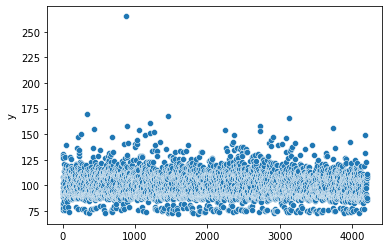

In [387]:
sns.scatterplot(x=train_df.index, y='y',data=train_df)

<AxesSubplot:>

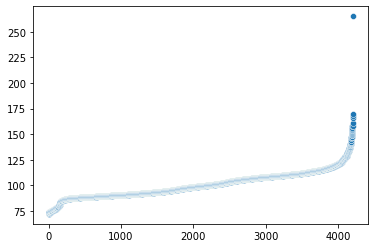

In [388]:
sorted_y = np.sort(train_df['y'])
sns.scatterplot(x=train_df.index, y=sorted_y,data=train_df)

### Observation 

- Looks like there is one significant outlier

In [389]:
train_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 13.8 MB


In [390]:
d_types = train_df.dtypes.reset_index()
d_types.columns = ['Count','Column Type']
d_types.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


### Observation

- 369 Variables are int64
- 1 variable is float64
- 8 variables are categorical (object)

In [391]:
train_df.dtypes[train_df.dtypes == 'object']

X0    object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X8    object
dtype: object

In [392]:
train_df.isnull().sum().sort_values(ascending=False)

ID      0
X254    0
X263    0
X262    0
X261    0
       ..
X127    0
X126    0
X125    0
X124    0
X385    0
Length: 378, dtype: int64

### Observation

- There are no missing values in the dataset

### Observation

- Cateogrical Variables: 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'

In [393]:
train_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [394]:
train_df.nunique().sort_values(ascending=False)

ID      4209
y       2545
X0        47
X2        44
X5        29
        ... 
X93        1
X233       1
X347       1
X268       1
X289       1
Length: 378, dtype: int64

In [395]:
numerical_df = train_df.drop(columns=['ID','y','X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'])
numerical_df

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [396]:
numerical_df.nunique().sort_values(ascending=False)

X10     2
X243    2
X263    2
X262    2
X261    2
       ..
X235    1
X347    1
X233    1
X268    1
X290    1
Length: 368, dtype: int64

### Observation

- All numerical variables are either binary [0,1] or contain only 1 number [0]
- There are plenty of variables where there is only one unique values -- These will be dropped

### Now Label Encoding will be applied to the categorical variables

In [397]:
le = preprocessing.LabelEncoder()

cat_columns = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

train_df[cat_columns] = train_df[cat_columns].apply(le.fit_transform)
test_df[cat_columns] = test_df[cat_columns].apply(le.fit_transform)

In [398]:
train_df.shape

(4209, 378)

In [399]:
test_df.shape

(4209, 377)

In [304]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,2466,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,1,366,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,2,69,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,3,133,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,4,106,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


In [370]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


### Observation

- All categorical data has been transformed to numerical

In [305]:
d_types = train_df.dtypes.reset_index()
d_types.columns = ['Count','Column Type']
d_types.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,378


### Drop all Columns w/ Zero Variance

In [400]:
zero_var_columns = []

for col in train_df:
    if train_df[col].var() == 0:
        print(col)
        zero_var_columns.append(col)

for col in test_df:
    if test_df[col].var() == 0:
        print(col)
        zero_var_columns.append(col)

train_df.drop(columns=zero_var_columns, inplace=True)
test_df.drop(columns=zero_var_columns, inplace=True)

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X347
X257
X258
X295
X296
X369


In [401]:
print(train_df.shape)
print(test_df.shape)

(4209, 361)
(4209, 360)


### Observation

- Droped Columns because of 0 variance:
'X11'
'X93'
'X107'
'X233'
'X235'
'X268'
'X289'
'X290'
'X293'
X297'
'X330'
'X347'

In [307]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,2466,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,1,366,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,2,69,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,3,133,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,4,106,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


### Dependent Variable Observation

In [308]:
train_df['y'].describe()

count    4209.000000
mean     1200.809931
std       694.116229
min         0.000000
25%       575.000000
50%      1161.000000
75%      1784.000000
max      2544.000000
Name: y, dtype: float64

In [309]:
train_df['y'].var()

481797.3393405142

### Observation

- It appears that the mean and median are close on the dependent variable, indicating that this is a mostly normal distribution.
- The mean is greater than the median, indicating a left skew

### Separate Dependent Variable from dataset

In [402]:
y_train = train_df['y']

In [403]:
train_df.drop(columns='y', inplace = True)

In [404]:
X_train = train_df
X_test = test_df

In [407]:
print(X_train.shape)
print(X_test.shape)

(4209, 360)
(4209, 360)


### Decomposition / Dimensionality Reduction

The data will now be reduced so that only the most impactful variables remain

In [375]:
col_before_drop = X_train.columns

In [376]:
col_before_drop

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=365)

In [408]:
from feature_engine.selection import DropConstantFeatures

# Drop constant
drop_const = DropConstantFeatures()
drop_const.fit(train_df)

X_train = drop_const.transform(X_train)
X_test = drop_const.transform(X_test)

# Drops 0 features

In [409]:
from feature_engine.selection import DropDuplicateFeatures

# Drop duplicates
drop_dup = DropDuplicateFeatures()
drop_dup.fit(X_train)

X_train = drop_dup.transform(X_train)

# Drops 45 features

In [410]:
X_test = drop_dup.transform(X_test)

In [411]:
col_dup_features = X_train.columns

In [412]:
col_dup_features.difference(col_before_drop)

Index([], dtype='object')

In [413]:
col_before_drop.difference(col_dup_features)

Index(['X102', 'X113', 'X119', 'X122', 'X134', 'X146', 'X147', 'X172', 'X199',
       'X213', 'X214', 'X216', 'X222', 'X226', 'X227', 'X232', 'X239', 'X242',
       'X243', 'X244', 'X245', 'X247', 'X248', 'X253', 'X254', 'X257', 'X258',
       'X262', 'X266', 'X279', 'X295', 'X296', 'X299', 'X302', 'X320', 'X324',
       'X326', 'X35', 'X360', 'X364', 'X365', 'X369', 'X37', 'X382', 'X385',
       'X39', 'X76', 'X84', 'X94'],
      dtype='object')

Columns dropped becuase they are duplicate features: 

'X102', 'X113', 'X119', 'X122', 'X134', 'X146', 'X147', 'X172', 'X199',
       'X213', 'X214', 'X216', 'X222', 'X226', 'X227', 'X232', 'X239', 'X242',
       'X243', 'X244', 'X245', 'X247', 'X248', 'X253', 'X254', 'X262', 'X266',
       'X279', 'X296', 'X299', 'X302', 'X320', 'X324', 'X326', 'X35', 'X360',
       'X364', 'X365', 'X37', 'X382', 'X385', 'X39', 'X76', 'X84', 'X94'

In [414]:
# Drop ID manually becuase it wasn't dropped in the other algorithms
X_train.drop(columns='ID', inplace=True)
X_test.drop(columns='ID', inplace=True)

In [415]:
print(X_train.shape)
print(X_test.shape)

(4209, 315)
(4209, 315)


In [416]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

### Now We will Run XGBoost to build the model & predict test values

In [418]:
import xgboost as xgb

n_estimators = 1000
max_depth=7
eta=0.1
subsample=0.7
colsample_bytree=0.8

model = xgb.XGBRegressor(n_estimators = 1000,
max_depth=7,
eta=0.1,
subsample=0.7,
colsample_bytree=0.8)

In [419]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [421]:
predicted_vals = model.predict(X_test)

In [422]:
predicted_vals

array([ 77.73422 ,  98.885345,  99.162766, ..., 102.68661 , 113.01568 ,
       102.83555 ], dtype=float32)

In [426]:
prediction_df = pd.DataFrame(predicted_vals, columns=['y'])

<AxesSubplot:ylabel='y'>

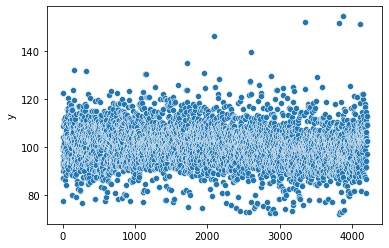

In [428]:
sns.scatterplot(x=prediction_df.index, y='y',data=prediction_df)

In [476]:
pred_df = prediction_df
pred_df.rename(columns={'y_pred':'y'}, inplace=True)
pred_df['type'] = 'actual'
pred_df

,y,type
0,77.734222,actual
1,98.885345,actual
2,99.162766,actual
3,90.056816,actual
4,92.297867,actual
...,...,...
4204,109.199173,actual
4205,97.155357,actual
4206,102.686607,actual
4207,113.015678,actual


In [477]:
y_train_df = pd.DataFrame(y_train, columns = ['y'])
y_train_df['type'] = 'predicted'
y_train_df

,y,type
0,130.81,predicted
1,88.53,predicted
2,76.26,predicted
3,80.62,predicted
4,78.02,predicted
...,...,...
4204,107.39,predicted
4205,108.77,predicted
4206,109.22,predicted
4207,87.48,predicted


In [478]:
overall_df = y_train_df.append(pred_df)
overall_df

/var/folders/9b/p3b6_xms07s4qmgrgn172by00000gn/T/ipykernel_16493/227601545.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  overall_df = y_train_df.append(pred_df)


,y,type
0,130.810000,predicted
1,88.530000,predicted
2,76.260000,predicted
3,80.620000,predicted
4,78.020000,predicted
...,...,...
4204,109.199173,actual
4205,97.155357,actual
4206,102.686607,actual
4207,113.015678,actual


<AxesSubplot:ylabel='y'>

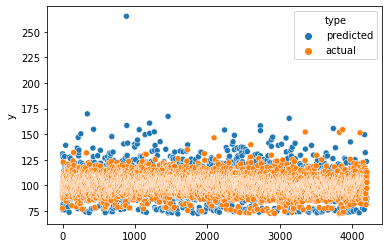

In [479]:
sns.scatterplot(data=overall_df, x=overall_df.index, y='y',hue='type')

### Observation

The model cannot be evaluated for accuracy or any other metrics because there was no y_test given in the dataset. When overlaying the results from the XGBoost algorithm, the predicted values fall believably within the actual values.

### Evaluation of model parameters

In [348]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

In [349]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/westonmauz/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in

In [353]:
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 426.211 (13.974)


This metric would be evaluated to achieve the best parameters for the XGBoost algorithm